In [1]:
import numpy as np
import pandas as pd
import re
import nltk
# nltk.download('stopwords')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_source_url = "https://raw.githubusercontent.com/satyajeetkrjha/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [3]:
!pip install nltk


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
airline_tweets['text'][3]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

<AxesSubplot:ylabel='airline'>

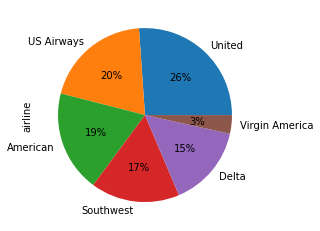

In [6]:
airline_tweets.airline.value_counts().plot(kind='pie',autopct='%1.0f%%')

<AxesSubplot:ylabel='airline_sentiment'>

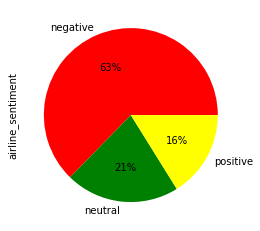

In [7]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%',colors=["red","green","yellow"])

In [8]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [9]:
labels[:4]

array(['neutral', 'positive', 'neutral', 'negative'], dtype=object)

In [10]:
processed_features = []

for sentence in range(0,len(features)):
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
        
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
                                
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
                                
    processed_feature = re.sub(r'^b\s+','',processed_feature)
                                
    processed_feature = processed_feature.lower()
                                     
    processed_features.append(processed_feature)    
    
# processed_features = []
# for sentence in range(0, len(features)): 
# # Remove all the special characters
#     processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
# # remove all single characters
#     processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
# # Remove single characters from the start
#     processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
# # Substituting multiple spaces with single space
#     processed_feature = re.sub(r'\s+', 5' ', processed_feature, flags=re.I)
# # Removing prefixed 'b'
#     processed_feature = re.sub(r'^b\s+', '', processed_feature)
# # Converting to Lowercase
#     processed_feature = processed_feature.lower()
#     processed_features.append(processed_feature)

In [11]:
processed_features[3]

' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse'

In [12]:
for i in range(10):
     print(f"Features (DOC{i}) :- {processed_features[i]}, Labels :- {labels[i]}")

Features (DOC0) :-  virginamerica what dhepburn said , Labels :- neutral
Features (DOC1) :-  virginamerica plus you ve added commercials to the experience tacky , Labels :- positive
Features (DOC2) :-  virginamerica didn today must mean need to take another trip , Labels :- neutral
Features (DOC3) :-  virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse, Labels :- negative
Features (DOC4) :-  virginamerica and it a really big bad thing about it, Labels :- negative
Features (DOC5) :-  virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va, Labels :- negative
Features (DOC6) :-  virginamerica yes nearly every time fly vx this ear worm won go away , Labels :- positive
Features (DOC7) :-  virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp, Labels :- neutral
Features (DOC8) :-  virginamerica well didn but n

TF= (Frequency of a word in the document)/(Total words in the document)

IDF=Log((Total number of docs)/(Number of docs containing the word))


In [13]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

# from nltk.corpus import stopwords 
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(max_features=2500, min_df=7, max_df=0.8,stop_words=stopwords.words('english'))
# processed_features = vectorizer.fit_transform(processed_features).toarray() 

In [14]:
max(processed_features[3].tolist())

0.589838078990556

In [15]:
# processed_features[0].tolist()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features,labels, test_size=0.2,random_state=0) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


text_classifier = SVC()
text_classifier.fit(X_train,y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import Classification_report,confusion_matrix,accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))